In [1]:
from scipy.optimize import minimize
import numpy as np
import pandas as pd
import sys

In [2]:
from google.colab import drive
drive.mount('/content/drive')
import sys
ROOT_PATH = 'drive/My Drive/wada/julia'


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#def lik_fcn(PRMTR, XX, YY):
def lik_fcn(PRMTR):
  SIG_E=PRMTR[0]
  SIG_1=PRMTR[1]
  SIG_2=PRMTR[2]
  SIG_3=PRMTR[3]
  SIG_4=PRMTR[4]
  SIG_5=PRMTR[5]

  TVP_NO = 5
  F = np.eye(TVP_NO)
  RR = SIG_E**2
  QQ = np.zeros((5,5))
  QQ[0,0] = SIG_1**2; QQ[1,1] = SIG_2**2; QQ[2,2] = SIG_3**2; 
  QQ[3,3] = SIG_4**2; QQ[4,4] = SIG_5**2;

  BETA_LL = np.zeros((5,1))
  P_LL=np.eye(TVP_NO)*50

  START=10
  T = len(XX)
  LIK=0.0
  J_ITER=0
  while J_ITER<T:
    XT = XX[J_ITER:J_ITER+1,:]; YT=yy[J_ITER];
    BETA_TL = np.dot(F, BETA_LL)
    P_TL = np.dot(np.dot(F, P_LL), F.T) + QQ
    
    F_CAST = YT - np.dot(XT,BETA_TL)
    SS = np.dot(np.dot(XT,P_TL),XT.T) + RR

    BETA_TT = BETA_TL + np.dot(np.dot(P_TL,XT.T)/SS, F_CAST)
    P_TT = np.dot(np.eye(TVP_NO) - np.dot(np.dot(P_TL,XT.T)/SS, XT), P_TL)

    BETA_LL=BETA_TT;  P_LL=P_TT;

    if J_ITER>START:
      LIK += 0.5*(np.log(2*np.pi*SS) + F_CAST**2/SS)
    J_ITER+=1
  return LIK

In [4]:
#def lik_fcn(PRMTR, XX, YY):
def model(PRMTR):


  SIG_E=PRMTR[0]
  SIG_1=PRMTR[1]
  SIG_2=PRMTR[2]
  SIG_3=PRMTR[3]
  SIG_4=PRMTR[4]
  SIG_5=PRMTR[5]

  TVP_NO = 5
  F = np.eye(TVP_NO)
  RR = SIG_E**2
  QQ = np.zeros((5,5))
  QQ[0,0] = SIG_1**2; QQ[1,1] = SIG_2**2; QQ[2,2] = SIG_3**2; 
  QQ[3,3] = SIG_4**2; QQ[4,4] = SIG_5**2;

  BETA_LL = np.zeros((5,1))
  P_LL=np.eye(TVP_NO)*50

  START=10
  T = len(XX)
  LIK=0.0
  J_ITER=0

  DTA_MAT=np.zeros((T,2))
  DTA_MAT2=np.zeros((T,5))

  while J_ITER<T:
    sys.stdout.write('\r%d' %(J_ITER))
    XT = XX[J_ITER:J_ITER+1,:]; YT=yy[J_ITER];
    BETA_TL = np.dot(F, BETA_LL)
    P_TL = np.dot(np.dot(F, P_LL), F.T) + QQ
    
    F_CAST = YT - np.dot(XT,BETA_TL)
    SS = np.dot(np.dot(XT,P_TL),XT.T) + RR

    BETA_TT = BETA_TL + np.dot(np.dot(P_TL,XT.T)/SS, F_CAST)
    P_TT = np.dot(np.eye(TVP_NO) - np.dot(np.dot(P_TL,XT.T)/SS, XT), P_TL)

    DTA_MAT[J_ITER,:] = np.concatenate([F_CAST, SS], 1)
    DTA_MAT2[J_ITER,:] = BETA_TL.T

    BETA_LL=BETA_TT;  P_LL=P_TT

    J_ITER+=1

  return DTA_MAT[START:,:], DTA_MAT2[START:,:]

In [5]:
dataname = "tvp.txt"
data = pd.read_table('/content/drive/My Drive/wada/julia/'+dataname, sep='\s+', header=None)

In [6]:
data = data[:-1].values
data = data.astype(float)

In [7]:
date = data[:,0]
data = data[:,1:]
yy = data[:,0]
T = len(data)
XX = np.concatenate([np.ones((T,1)), data[:,1:]],1)
XX

array([[ 1.00000e+00,  2.26667e-01,  1.91755e-01,  1.03000e-01,
         8.28304e-01],
       [ 1.00000e+00,  5.40000e-01,  4.96848e-01,  4.40000e-02,
         7.51356e-01],
       [ 1.00000e+00,  6.90000e-01,  6.08136e-01,  5.80000e-02,
        -8.69262e-01],
       [ 1.00000e+00, -3.56667e-01,  1.13615e-01,  1.88000e-01,
        -2.59896e-01],
       [ 1.00000e+00, -8.80000e-01,  6.03775e-01,  1.26000e-01,
        -1.65737e-01],
       [ 1.00000e+00, -6.33333e-01,  3.76150e-02,  8.70000e-02,
         9.43401e-01],
       [ 1.00000e+00, -5.33330e-02,  6.37303e-01,  9.60000e-02,
        -4.69620e-02],
       [ 1.00000e+00,  4.33330e-02,  2.23964e-01, -4.00000e-03,
         5.38708e-01],
       [ 1.00000e+00, -4.66670e-02, -3.72920e-02, -4.30000e-02,
         7.67892e-01],
       [ 1.00000e+00,  0.00000e+00,  4.09455e-01, -3.40000e-02,
         6.00882e-01],
       [ 1.00000e+00,  1.56667e-01,  1.11379e-01, -5.90000e-02,
         9.40261e-01],
       [ 1.00000e+00,  2.63333e-01,  4.0733

In [8]:
pr_1=0.5;pr_2=0.1;pr_3=0.1;
pr_4=0.1;pr_5=0.1;pr_6=0.1;
PRMTR_IN=np.zeros(6)
PRMTR_IN[0] = pr_1; PRMTR_IN[1] = pr_2; PRMTR_IN[2] = pr_3;
PRMTR_IN[3] = pr_4; PRMTR_IN[4] = pr_5; PRMTR_IN[5] = pr_6;  
PRMTR_IN

array([0.5, 0.1, 0.1, 0.1, 0.1, 0.1])

In [9]:
#results = minimize(lik_fcn, PRMTR_IN, args=(XX, yy), method='nelder-mead')
results = minimize(lik_fcn, PRMTR_IN, method='nelder-mead')

In [10]:
results

 final_simplex: (array([[0.37999079, 0.11056551, 0.0174251 , 0.26688876, 0.03396874,
        0.02229268],
       [0.38000285, 0.11056913, 0.0174609 , 0.26684426, 0.034049  ,
        0.02230192],
       [0.37994997, 0.11056053, 0.01744852, 0.26689273, 0.03401508,
        0.02228599],
       [0.37998322, 0.11059948, 0.01743837, 0.26680893, 0.03406133,
        0.02229826],
       [0.37994146, 0.11055564, 0.01742828, 0.26687604, 0.03399876,
        0.0223298 ],
       [0.3800383 , 0.11052823, 0.01744434, 0.26680263, 0.03402789,
        0.02229858],
       [0.37995973, 0.11057919, 0.01745074, 0.2668318 , 0.03388497,
        0.0222886 ]]), array([96.9119127 , 96.91191286, 96.91191313, 96.91191323, 96.91191329,
       96.91191345, 96.91191384]))
           fun: 96.91191270196573
       message: 'Optimization terminated successfully.'
          nfev: 477
           nit: 315
        status: 0
       success: True
             x: array([0.37999079, 0.11056551, 0.0174251 , 0.26688876, 0.03396874,

In [11]:
dta_mat, dta_mat2=model(results.x)

105

In [12]:
date[11]//1

62.0

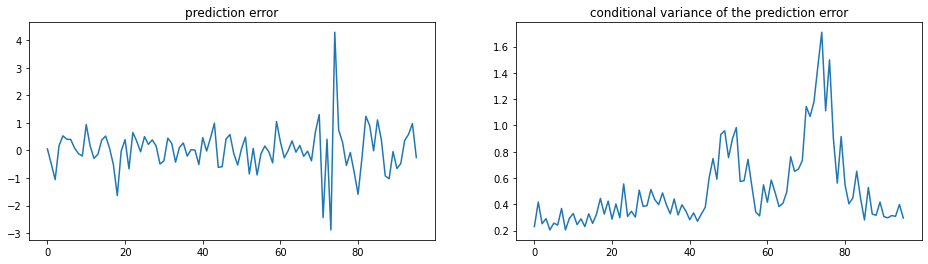

In [13]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(16.0, 4.0))
ax1 = fig.add_subplot(1, 2, 1)
ax1.set_title("prediction error")
plt.plot(dta_mat[:,0])
ax2 = fig.add_subplot(1, 2, 2)
ax2.set_title("conditional variance of the prediction error")
plt.plot(dta_mat[:,1])

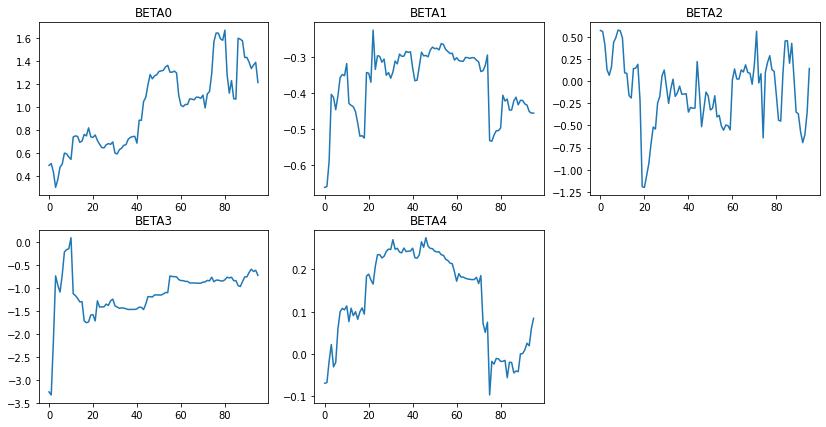

In [17]:
fig = plt.figure(figsize=(14.0, 7.0))
ax1 = fig.add_subplot(2, 3, 1)
ax1.set_title("BETA0")
ax1.plot(dta_mat2[:,0])
ax2 = fig.add_subplot(2, 3, 2)
ax2.set_title("BETA1")
ax2.plot(dta_mat2[:,1])
ax3 = fig.add_subplot(2, 3, 3)
ax3.set_title("BETA2")
ax3.plot(dta_mat2[:,2])
ax4 = fig.add_subplot(2, 3, 4)
ax4.set_title("BETA3")
ax4.plot(dta_mat2[:,3])
ax5 = fig.add_subplot(2, 3, 5)
ax5.set_title("BETA4")
ax5.plot(dta_mat2[:,4])
#plt.subplots_adjust(hspace=0.2, wspace=0.2)